# 분해(Decomposition)

* 큰 하나의 행렬을 여러개의 작은 행렬로 분해
* 분해 과정에서 중요한 정보만 남게됨

## 데이터 불러오기 및 시각화

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, SparsePCA
from sklearn.decomposition import TruncatedSVD, DictionaryLearning, FactorAnalysis
from sklearn.decomposition import FastICA, NMF, LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [12]:
iris, labels = load_iris(return_X_y=True)
faces,_ = fetch_olivetti_faces(return_X_y=True, shuffle=True)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [13]:
def plot_iris(iris, labels):
  plt.figure()
  colors = ['navy', 'purple', 'red']
  for xy, labels in zip(iris, labels):
    plt.scatter(xy[0], xy[1], color=colors[labels])

In [14]:
def show_faces(faces):
  plt.figure()
  num_rows, num_cols = 2, 3
  for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(np.reshape(faces[i], (64 ,64)), cmap=plt.cm.gray)

In [17]:
iris.shape

(150, 4)

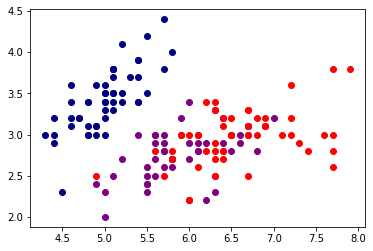

In [18]:
plot_iris(iris[:, :2], labels)

In [19]:
faces.shape

(400, 4096)

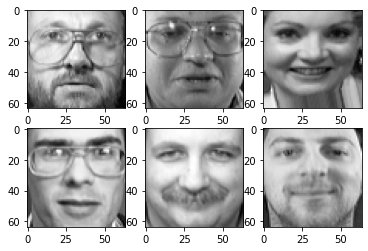

In [20]:
show_faces(faces)

### Principal Component Analsis (PCA)

* PCA를 사용해 iris 데이터 변환
* 150 × 4 크기의 데이터를 150 × 2 크기의 행렬로 압축

In [57]:
model = PCA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

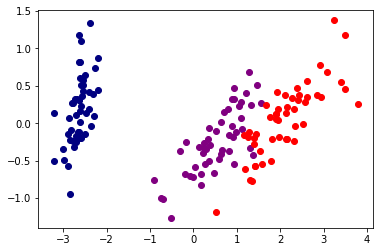

In [58]:
plot_iris(transformed_iris, labels)

* PCA를 통해 학습도니 각 컴포넌트 (6개)
* 각 컴포넌트는 얼굴의 주요 특징을 나타냄

In [59]:
model = PCA(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
faces_components.shape

(6, 4096)

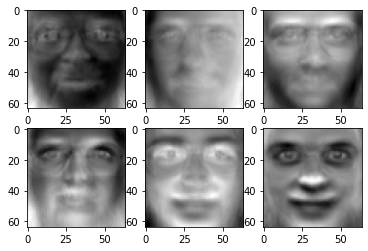

In [60]:
show_faces(faces_components)

### Incremental PCA

* PCA는 SVD 알고리즘 실행을 위해 전체 학습용 데이터 셋을 메모리에 올려야 함
* Incremental PCA는 학습 데이터를 미니 배치 단위로 나누어 사용
* 학습 데이터가 크거나 온라인으로 PCA 적용이 필요할때 유용

In [61]:
model = IncrementalPCA(n_components=2)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

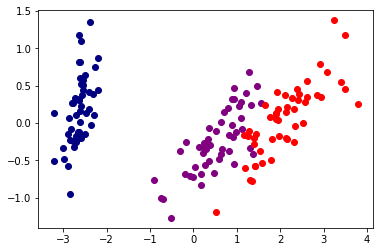

In [62]:
plot_iris(transformed_iris, labels)

In [63]:
model = IncrementalPCA(n_components=2*3)
model.fit(faces)
faces_components = model.components_
faces_components.shape

(6, 4096)

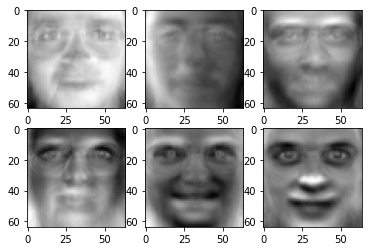

In [ ]:
show_faces(faces_components)

### Kernel PCA

* 차원 축소를 위한 복잡한 비선형 투형

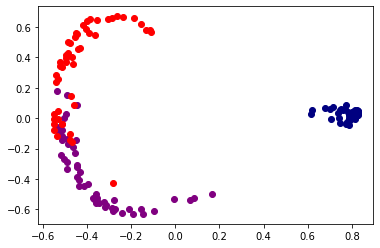

In [64]:
model = KernelPCA(n_components=2, kernel='rbf', random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

In [ ]:
#model = KernelPCA(n_components=2*3, kernel='rbf', random_state=0)
#model.fit(faces)
#faces_components = model.components_
#faces_components.shape
#kernelPCA는 components_ 를 반환 할수 없기때문에 위의 코드는 실행될수 없다

### Sparse PCA

* PCA의 주요 단점 중 하나는 주성분들이 보통 모든 입력 변수들의 선형 결합으로 나타난다는 점
* 희소 주성분 분석(Sparse PCA)는 몇 개 변수들만의 선형 결합으로 주성분을 나타냄으로써 이러한 단점을 극복

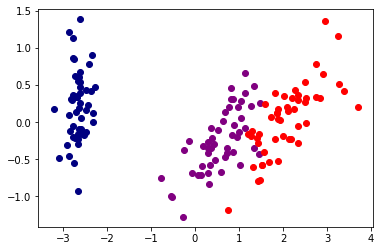

In [65]:
model = SparsePCA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

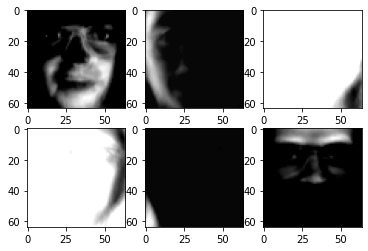

In [66]:
model = SparsePCA(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

### Truncated Singular Value Decomposition(Truncated SVD)

* PCA는 정방행렬에 대해서만 행렬 분해 가능
* SVD는 정방행렬에 뿐만 아니라 행과 열이 다른 행렬도 분해 가능
* PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하지만, SVD는 희소 행렬(Sparse Matris)에 대한 변환도 가능
* 전체 행렬 크기에 대해 Full SVD를 사용하는 경우는 적음
* 특이값이 0인 부분을 모두 제거하고 차원을 줄인 Truncated SVD 를 주로 사용

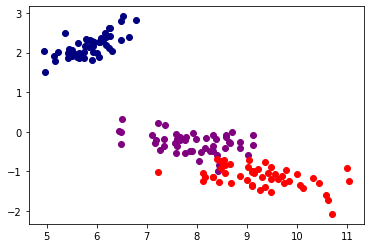

In [ ]:
model = TruncatedSVD(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

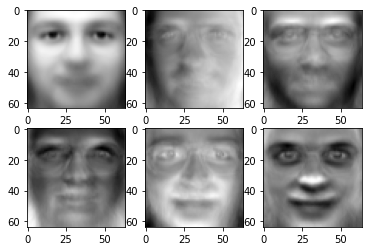

In [ ]:
model = TruncatedSVD(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

### Dictionary Learning

* Sparse code를 사용하여 데이터를 가장 잘 나타내는 사전 찾기
* Sparse coding은 overcomplete 기저벡터(basis vector)를 기반으로 데이터를 효율적으로 표현하기 위해 개발
* 기저 벡터는 벡터 공간에 속하는 벡터의 집합이 선형 독립이고, 다른 모든 벡터 공간의 벡터들이 그 벡터 집합의 선형 조합으로 나타남

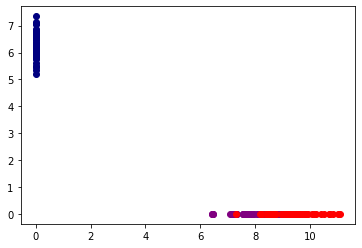

In [ ]:
model = DictionaryLearning(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

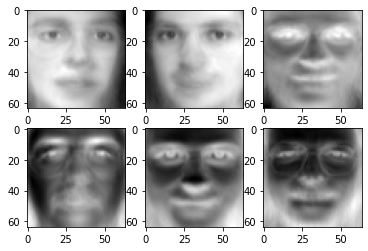

In [ ]:
model = DictionaryLearning(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

### Factor Analysis

* 요인 분석(Factor Analysis)은 변수들 간의 상관 관계를 고려하여 저변에 내재된 개념인 요인들을 추출해내는 분석방법
* 요인 분석은 변수들 간의 상관관계를 고려하여 서로 유사한 변수들 끼리 묶어주는 방법
* PCA에서는 오차(error)를 고려하지 않고, 요인 분석에서는 오차(error)를 고려

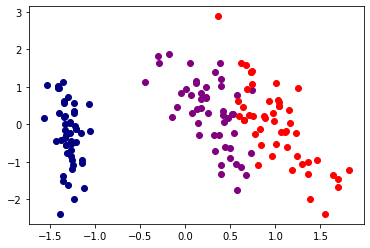

In [ ]:
model = FactorAnalysis(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

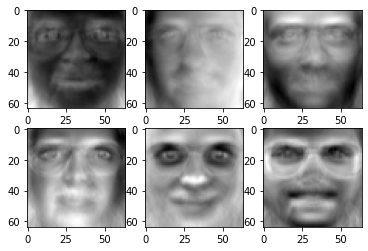

In [ ]:
model = FactorAnalysis(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

### Independent Component Analysis(ICA)


* 독립 성분 분석(Independent Component Analysis, ICA)은 다변량의 신호를 통계적으로 독립적인 하부 성분으로 분리하는 계산  방법
* ICA는 주성분을 이용하는 점은 PCA와 유사하지만, 데이터를 가장 잘 설명하는 축을 찾는 PCA와 달리 가장 독립적인 축, 독립성이 최대가 되는 벡터를 찾음

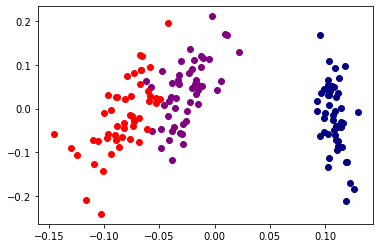

In [ ]:
model = FastICA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

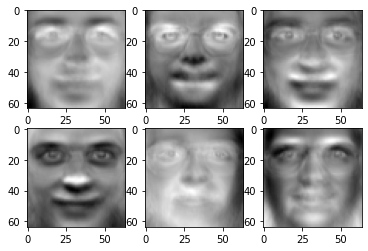

In [ ]:
model = FastICA(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

### Non_negative Matrix Factorization

* 음수 미포함 행렬 분해(Non-negative matrix factorization, NMF)는 음수를 포함하지 않은 행렬 V를 음수를 포함하지 않은 행렬 W와 H의 곱으로 분해하는 알고리즘

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


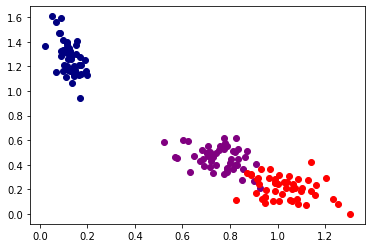

In [ ]:
model = NMF(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


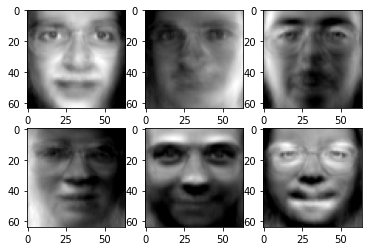

In [ ]:
model = NMF(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

### Latent Dirichlet Allocation(LDA)

* 잠재 디리클레 할당은 이산 자료들에 대한 확률적 생성 모형
* 디리클레 분포에 따라 잠재적인 의미 구조를 파악

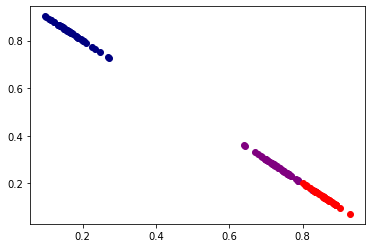

In [ ]:
model = LatentDirichletAllocation(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

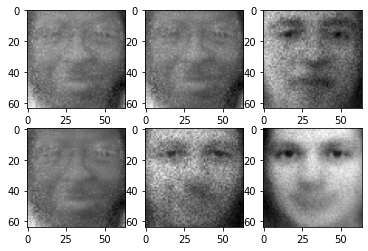

In [ ]:
model = LatentDirichletAllocation(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

###Linear DiscriminantAnalysis(LDA)

* LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소
* LDA는 지도학습 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원 축소

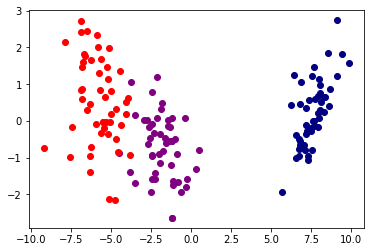

In [ ]:
model = LinearDiscriminantAnalysis(n_components=2)
model.fit(iris, labels)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

## 압축된 표현을 사용한 학습

* 행렬 분해를 통해 압축된 데이터를 사용해 학습

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

In [9]:
def min_max_scale(x):
  min_value, max_value = np.min(x, 0), np.max(x, 0)
  x = (x - min_value) / (max_value - min_value)
  return x

In [10]:
def plot_digits(digits, labels):
  digits = min_max_scale(digits)
  ax = plt.subplot(111, projection='3d')
  for i in range(digits.shape[0]):
    ax.text(digits[i, 0], digits[i, 1], digits[i, 2],
            str(labels[i]), color=plt.cm.Set1(labels[i] / 10.),
            fontdict={'weight': 'bold', 'size': 9})
  ax.view_init(4, -72)

In [18]:
digits = load_digits()

In [19]:
nmf = NMF(n_components=3)
nmf.fit(digits.data)
decomposed_digits = nmf.transform(digits.data)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [14]:
print(digits.data.shape)
print(decomposed_digits.shape)
print(decomposed_digits)

(1797, 64)
(1797, 3)
[[0.48392621 0.         1.24523914]
 [0.5829615  1.46767563 0.07150889]
 [0.61515882 1.10963209 0.387782  ]
 ...
 [0.55272665 1.26056522 0.7209474 ]
 [0.7872562  0.2789873  1.0495203 ]
 [0.78507412 0.67250885 0.92677983]]


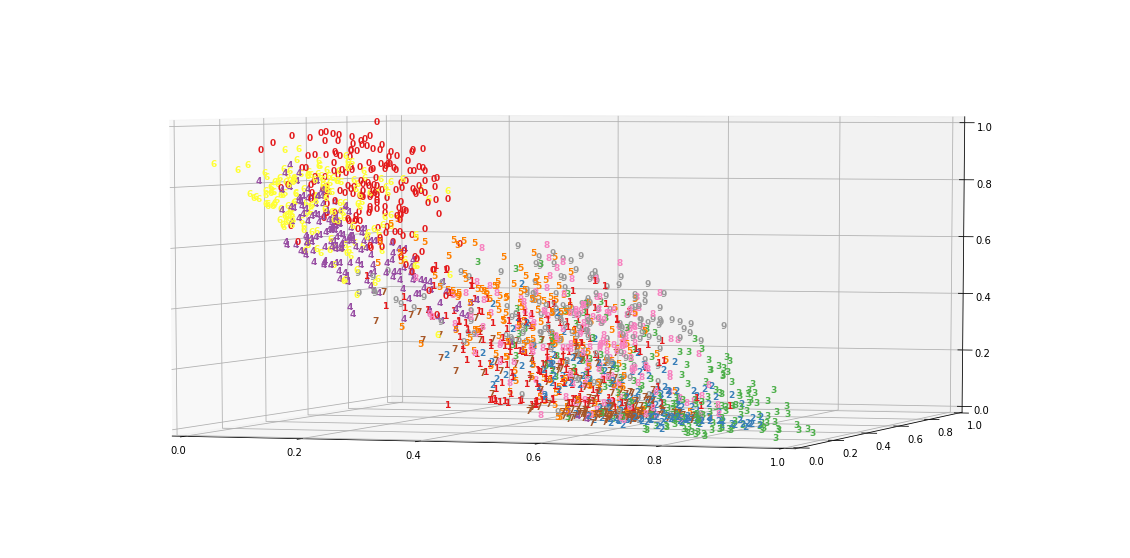

In [22]:
plt.figure(figsize=(20, 10))
plot_digits(decomposed_digits, digits.target)

#### KNN

In [23]:
knn = KNeighborsClassifier()

In [24]:
score = cross_val_score(
    estimator=knn,
    X=digits.data, y=digits.target,
    cv=5
)
score

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [25]:
print('mean cross val score; {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score; 0.9627282575054161 (+/- 0.011168537355954218)


In [26]:
score = cross_val_score(
    estimator=knn,
    X=decomposed_digits, y=digits.target,
    cv=5
)
score

array([0.54722222, 0.58055556, 0.64066852, 0.59610028, 0.56267409])

In [27]:
print('mean cross val score; {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score; 0.5854441349427422 (+/- 0.03214521445075084)


#### SVM

In [28]:
svm = SVC()

In [29]:
score = cross_val_score(
    estimator=svm,
    X=digits.data, y=digits.target,
    cv=5
)
score

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [30]:
print('mean cross val score; {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score; 0.9632838130609718 (+/- 0.02008605863225686)


In [32]:
score = cross_val_score(
    estimator=svm,
    X=decomposed_digits, y=digits.target,
    cv=5
)
score

array([0.61388889, 0.62222222, 0.66016713, 0.60167131, 0.59888579])

In [33]:
print('mean cross val score; {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score; 0.6193670690188796 (+/- 0.022070024720937543)


#### Decision Tree

In [34]:
decision_tree = DecisionTreeClassifier()

In [35]:
score = cross_val_score(
    estimator=decision_tree,
    X=digits.data, y=digits.target,
    cv=5
)
score

array([0.77777778, 0.71111111, 0.80222841, 0.81615599, 0.80222841])

In [36]:
print('mean cross val score; {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score; 0.7819003404518725 (+/- 0.03749138825903902)


In [37]:
score = cross_val_score(
    estimator=decision_tree,
    X=decomposed_digits, y=digits.target,
    cv=5
)
score

array([0.55277778, 0.50833333, 0.59052925, 0.58774373, 0.50417827])

In [38]:
print('mean cross val score; {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score; 0.548712472918601 (+/- 0.037154753353244606)


#### Random Forest

In [22]:
random_forest = RandomForestClassifier()

In [23]:
score = cross_val_score(
    estimator=random_forest,
    X=digits.data, y=digits.target,
    cv=5
)
score

array([0.92777778, 0.91388889, 0.95821727, 0.9637883 , 0.93036212])

In [24]:
print('mean cross val score; {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score; 0.9388068709377901 (+/- 0.019050963406600847)


In [25]:
score = cross_val_score(
    estimator=random_forest,
    X=decomposed_digits, y=digits.target,
    cv=5
)
score

array([0.59166667, 0.6       , 0.63231198, 0.57938719, 0.55431755])

In [26]:
print('mean cross val score; {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score; 0.5915366759517178 (+/- 0.025562251490028668)


## 복원된 표현을 사용한 학습

* 분해 후 복원된 행렬을 사용해 학습

In [20]:
components = nmf.components_
reconstructed_digits = decomposed_digits @ components
reconstructed_digits.shape

(1797, 64)

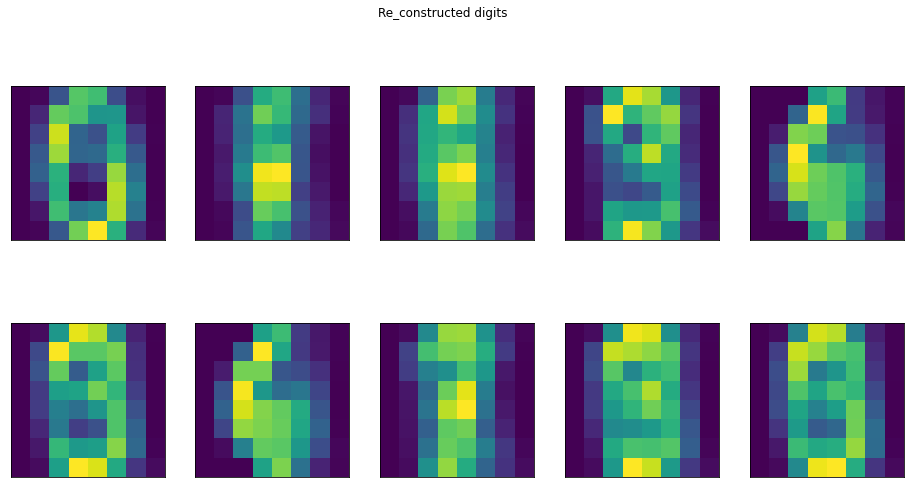

In [67]:
plt.figure(figsize=(16, 8))
plt.suptitle('Re_constructed digits')
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(reconstructed_digits[i].reshape(8, 8))

### KNN

In [47]:
score = cross_val_score(
    estimator=knn,
    X=reconstructed_digits, y=digits.target,
    cv=5
)
score

array([0.54166667, 0.59444444, 0.66295265, 0.57660167, 0.57381616])

In [48]:
print('mean cross val score; {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score; 0.5898963169297431 (+/- 0.04029722337499952)


### SVM

In [49]:
score = cross_val_score(
    estimator=svm,
    X=reconstructed_digits, y=digits.target,
    cv=5
)
score

array([0.62777778, 0.60555556, 0.66016713, 0.61002786, 0.5821727 ])

In [50]:
print('mean cross val score; {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score; 0.6171402042711235 (+/- 0.025969174809053776)


### Decision Tree

In [51]:
score = cross_val_score(
    estimator=decision_tree,
    X=reconstructed_digits, y=digits.target,
    cv=5
)
score

array([0.58055556, 0.53888889, 0.53481894, 0.55710306, 0.53760446])

In [52]:
print('mean cross val score; {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score; 0.5497941813679975 (+/- 0.01727110017163035)


###Random Forest

In [27]:
score = cross_val_score(
    estimator=random_forest,
    X=reconstructed_digits, y=digits.target,
    cv=5
)
score

array([0.58333333, 0.58611111, 0.6545961 , 0.59888579, 0.57103064])

In [28]:
print('mean cross val score; {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score; 0.5987913958526772 (+/- 0.02927310982256195)


## 이미지 복원

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train_faces, test_faces = train_test_split(faces, test_size=0.1)

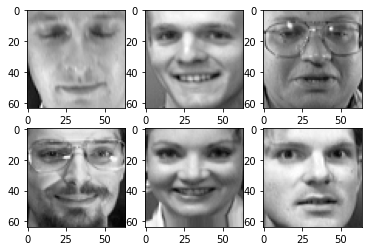

In [31]:
show_faces(train_faces)

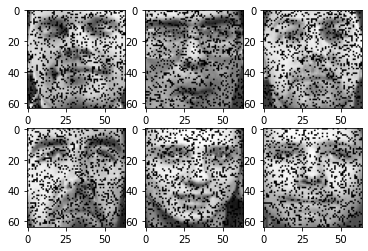

In [32]:
damaged_faces = []
for face in test_faces:
  idx =np.random.choice(range(64 * 64), size =1024)
  damaged_face = face.copy()
  damaged_face[idx] = 0.
  damaged_faces.append(damaged_face)
show_faces(damaged_faces)

In [36]:
nmf = NMF(n_components=10)
nmf.fit(train_faces)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF(n_components=10)

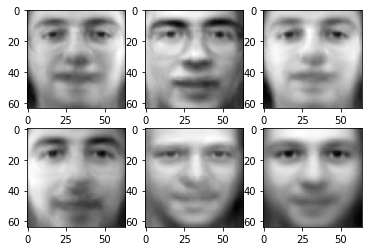

In [37]:
images = np.asarray(damaged_faces, dtype=np.float32)
matrix1 = nmf.transform(images)
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)

In [38]:
nmf = NMF(n_components=100)
nmf.fit(train_faces)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF(n_components=100)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


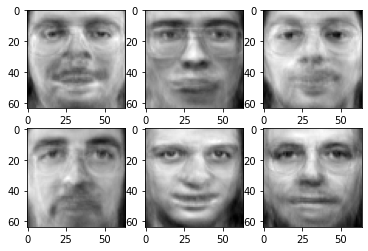

In [39]:
matrix1 = nmf.transform(images)
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)

In [40]:
nmf = NMF(n_components=300)
nmf.fit(train_faces)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF(n_components=300)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


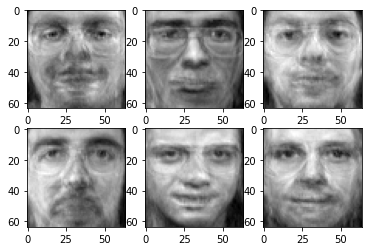

In [42]:
matrix1 = nmf.transform(images)
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)

# 참고자료

* 유튜브 강의 : https://www.youtube.com/watch?v=tI0D15lH2iU&list=PL7ZVZgsnLwEEd3-h-jySLz4wT154r7VVr&index=13